In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver.simple_hrl_solver 

In [2]:
def gram_schmidt(N, K):
    """
    Given the dimension space dimension N, generate K random vectors and its orthogonal spans
    """

    def proj(u, v):
        """
        Return projection of v to u
        """
        return np.dot(v, u) / np.dot(u, u) * u

    V = np.random.normal(loc=0., scale=1., size=(K, N))
    U = np.zeros_like(V)

    ## Initialise u1 to v1
    U[0] = V[0]

    ## Gram-schomidt process
    for k in range(1, K):
        projection_terms = [proj(U[i], V[k]) for i in range(k)]
        U[k] = V[k] - np.sum(projection_terms, axis=0)

    return V, U


def control_VS(VT, angle):
    dim = len(VT)
    VT_norm = VT / np.linalg.norm(VT)
    a = np.random.normal(loc=0., scale=0.1, size=(dim))
    b = np.random.normal(loc=0., scale=0.1, size=(dim))
    a[0]=0.
    b[0]=1.
    h = (b - a) - np.dot((b - a), VT_norm) * VT_norm
    v = np.cos(angle) * VT_norm + np.sin(angle) * h / np.linalg.norm(h)

    return v


In [43]:
N = 1000
Ts = [6]
Ks = [2]
identical = False
v_norm = 0
w_angle = np.pi/2
v_angle = np.pi/4
lr_w = 1.
lr_wc = 1.
lr_v = 1.

nums_iter = np.array([0, 200000])
nums_iter_curr = np.array([50000, 10000])
update_frequency = 10
VT_1 = np.array([np.sqrt(0.5), np.sqrt(0.5)])
VT_2 = np.array([np.sqrt(0.9), np.sqrt(0.1)])

VS_1 = np.array([np.sqrt(0.9), np.sqrt(0.1)])
VS_2 = np.array([np.sqrt(0.5), np.sqrt(0.5)])

VS = np.array([VS_1, VS_2])
VT = np.array([VT_1, VT_2])

In [44]:
def rho_k(t,k,T,VS,VT):
    z_term = 1/np.sqrt(2*np.pi)/np.pi/N*(2-T)*(VS[k]*VT[k])
    const = np.power(2, T-2)
    return np.pi * np.power(z_term*t + const, 1/(2-T)) - np.pi/2

def rho(t,k,T):
    z_term = 1/np.sqrt(2*np.pi)/np.pi/N*(2-T)
    const = np.power(2, T-2)
    return np.pi * np.power(z_term*t + const, 1/(2-T)) - np.pi/2

In [18]:
rho={t:{} for t in Ts}
for t in Ts:
    for n,vs in enumerate(VS):
        rho[t][n] = {}
        for k in range(2):
            rho_k_hist=[]
            for i in range(int(5*1e+5)):
                rho_k_hist.append(rho_k(i, k, t,vs, VT[n]))
            rho[t][n][k] = rho_k_hist

/tmp/ipykernel_1400236/1205917788.py:4: RuntimeWarning: invalid value encountered in power
  return np.pi * np.power(z_term*t + const, 1/(2-T)) - np.pi/2


(0.0, 1.1)

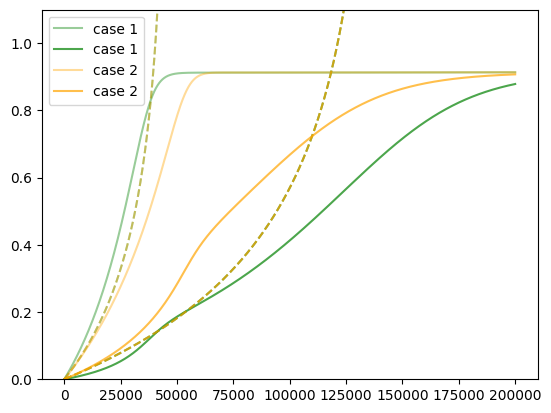

In [35]:
fig = plt.figure()
cs=['g', 'orange']

T=6
K=2
for vs_i in range(2):
    for k in range(2):
        plt.plot(rho[T][vs_i][k], ls = '--', alpha =0.3*k+0.4, c=cs[vs_i])
        plt.plot(np.linspace(0,200000, 20000),abs(ode_dic[T,K][vs_i].history['phase2']['R'][:,k,k][:]),
                 label = f'case {vs_i+1}', 
                 alpha = 0.3*k+0.4, c=cs[vs_i])
        """
        plt.plot(np.linspace(0,101000, 10100),
                  np.concatenate([ode_curr_dic[T,2][vs_i].history['phase1']['R'][:,k,k],
                                  ode_curr_dic[T,2][vs_i].history['phase1']['R'][:,k,k],
                                ode_curr_dic[T,2][vs_i].history['phase2']['R'][:,k,k]]), c=cs[vs_i], ls=':')
        """
        #plt.plot(np.linspace(0,300000, 30000),abs(ode_dic2[T,2][0].history['phase2']['VS'][:,k]), c=cs[k])
        #plt.plot(np.linspace(0,800000, 80000),abs(ode_dic[T,K][0].history['phase2']['overlap_tilde'][:][:]), 
        #         c=cs[n], ls = ':')
plt.legend()
plt.ylim(0,1.1)
#plt.xscale('log')

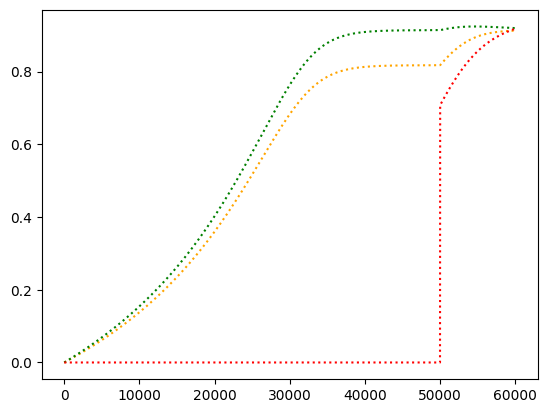

In [58]:
vs_i = 1
k=0
plt.plot(np.linspace(0,60000, 6000),
                  np.concatenate([ode_curr_dic[T,2][vs_i].history['phase1']['overlap_tilde'],
                                ode_curr_dic[T,2][vs_i].history['phase2']['overlap_tilde']]), c='orange', ls=':')
plt.plot(np.linspace(0,60000, 6000),
                  np.concatenate([ode_curr_dic[T,2][vs_i].history['phase1']['R'][:,k,k],
                                ode_curr_dic[T,2][vs_i].history['phase2']['R'][:,k,k]]), c='g', ls=':')

plt.plot(np.linspace(0,60000, 6000),
                  np.concatenate([ode_curr_dic[T,2][vs_i].history['phase1']['VS'][:,k],
                                ode_curr_dic[T,2][vs_i].history['phase2']['VS'][:,k]]), c='r', ls=':')

In [52]:
ode_curr_dic[T,2][vs_i].history['phase2']['overlap_tilde']

array([0.91367334, 0.91367354, 0.91367374, 0.91367394, 0.91367413,
       0.91367433, 0.91367452, 0.91367471, 0.91367491, 0.9136751 ,
       0.91367529, 0.91367548, 0.91367567, 0.91367586, 0.91367605,
       0.91367623, 0.91367642, 0.91367661, 0.91367679, 0.91367698,
       0.91367716, 0.91367735, 0.91367753, 0.91367771, 0.91367789,
       0.91367807, 0.91367825, 0.91367843, 0.91367861, 0.91367879,
       0.91367896, 0.91367914, 0.91367932, 0.91367949, 0.91367967,
       0.91367984, 0.91368001, 0.91368018, 0.91368036, 0.91368053,
       0.9136807 , 0.91368087, 0.91368104, 0.91368121, 0.91368137,
       0.91368154, 0.91368171, 0.91368187, 0.91368204, 0.9136822 ,
       0.91368237, 0.91368253, 0.91368269, 0.91368286, 0.91368302,
       0.91368318, 0.91368334, 0.9136835 , 0.91368366, 0.91368382,
       0.91368397, 0.91368413, 0.91368429, 0.91368444, 0.9136846 ,
       0.91368475, 0.91368491, 0.91368506, 0.91368521, 0.91368537,
       0.91368552, 0.91368567, 0.91368582, 0.91368597, 0.91368

(0.0, 1.1)

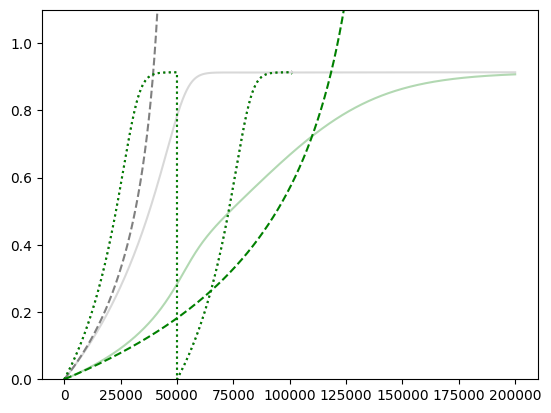

In [31]:
fig = plt.figure()
cs=['gray', 'g', 'b', 'orange']
vs_i = 1

for n,T in enumerate(Ts):
    for k in range(2):
        plt.plot(rho[T][vs_i][k], ls = '--', c=cs[k])
        plt.plot(np.linspace(0,200000, 20000),abs(ode_dic[T,2][vs_i].history['phase2']['R'][:,k,k][:]), 
                 c=cs[k], alpha = 0.3)

        plt.plot(np.linspace(0,101000, 10100),
                  np.concatenate([ode_curr_dic[T,2][vs_i].history['phase1']['R'][:,k,k],
                                  ode_curr_dic[T,2][vs_i].history['phase1']['R'][:,k,k],
                                ode_curr_dic[T,2][vs_i].history['phase2']['R'][:,k,k]]), 
                 c=cs[k], ls=':')
        #plt.plot(np.linspace(0,300000, 30000),abs(ode_dic2[T,2][0].history['phase2']['VS'][:,k]), c=cs[k])
        #plt.plot(np.linspace(0,800000, 80000),abs(ode_dic[T,K][0].history['phase2']['overlap_tilde'][:][:]), 
        #         c=cs[n], ls = ':')

plt.ylim(0,1.1)
#plt.xscale('log')

In [38]:
ode_dic[T,K][0].history['phase2'].keys()

dict_keys(['Q', 'R', 'P', 'overlap', 'P_tilde', 'overlap_tilde', 'VS', 'VT', 'VSVT'])

In [ ]:
np.linspace(0,300000, 30000)

In [11]:
rho_k_hist

[0.0,
 6.804237218105413e-08,
 1.3608475857296298e-07,
 2.0412715984186036e-07,
 2.721695764318355e-07,
 3.402120070106207e-07,
 4.0825445268843907e-07,
 4.7629691302120136e-07,
 5.443393884529968e-07,
 6.123818780956469e-07,
 6.804243828373302e-07,
 7.484669020119128e-07,
 8.165094360634839e-07,
 8.845519849920436e-07,
 9.525945485755472e-07,
 1.0206371268139947e-06,
 1.088679719707386e-06,
 1.1567223276998106e-06,
 1.2247649501251345e-06,
 1.292807587427447e-06,
 1.3608502391626587e-06,
 1.4288929059969036e-06,
 1.4969355874860923e-06,
 1.564978283630225e-06,
 1.6330209944293017e-06,
 1.7010637203274115e-06,
 1.7691064606584206e-06,
 1.8371492158664182e-06,
 1.9051919855073152e-06,
 1.9732347702472453e-06,
 2.0412775696421193e-06,
 2.109320383691937e-06,
 2.177363212396699e-06,
 2.2454060559784494e-06,
 2.3134489142151438e-06,
 2.3814917873288266e-06,
 2.4495346748754088e-06,
 2.517577577521024e-06,
 2.5856204948215833e-06,
 2.6536634267770864e-06,
 2.721706373165489e-06,
 2.78974933